In [1]:
from ultralytics import YOLO
YOLO_PATH = 'C:/Users/User/Desktop/bone_fracture_detection_project/XRayDetection/yolov5/weights/best.pt'

In [12]:
from PIL import Image
import numpy as np

In [19]:
image = Image.open('C:/Users/User/Downloads/FracAtlas/images/Fractured/IMG0000206.jpg').convert('RGB')
image_array = np.array(image)
yolo_model = YOLO(YOLO_PATH)
results = yolo_model(image_array)

class_id, class_name = '', ''
confidences = []
img_bbox = None
for r in results:
    img_bbox = r.plot()
    boxes = r.boxes  # Boxes object for bounding box outputs
    for box in boxes:
        class_id = box.cls  # Get class index
        class_name = r.names[int(class_id)]  # Get class name from names dictionary
        confidences.append(box.conf.cpu().numpy())

conf = np.mean(confidences)
diagnosis_result = 'bone-fractured' if class_name == 'positive' else 'normal'
# conf_value = conf.cpu().item() if hasattr(conf, 'cpu') else float(conf)
conf_value = np.mean(confidences)
diagnosis = f"My initial diagnosis {diagnosis_result}, and my confidence level is {conf_value:.2f}."


0: 640x512 2 Fractureds, 44.0ms
Speed: 4.0ms preprocess, 44.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


In [21]:
confidences

[array([    0.53915], dtype=float32), array([    0.25839], dtype=float32)]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

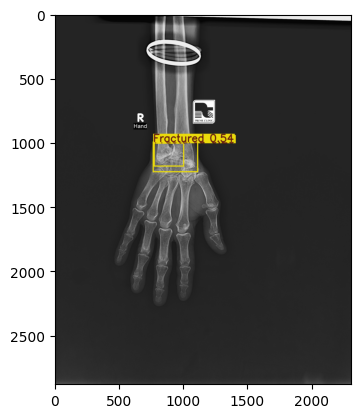

In [14]:
plt.imshow(img_bbox)